In [1]:
# !pip3 install pymysql
# !pip3 install ipython-sql
# !pip3 install mysqlclient
import warnings
warnings.filterwarnings("ignore")

#### Importing Libraries

In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

#### Connecting to MySQL database

In [3]:
db_name = "callerscan"
db_host = "localhost"
db_username = "root"
db_password = "Divya@1967"

try:
    conn = pymysql.connect(host=db_host, port = int(3306), user = 'root', passwd = db_password, db= db_name)
except e:
    print(e)

if conn:
    print("You are connected to database")
else :
    print("error")

You are connected to database


#### Query 1 : Find the total count of logins for each user, but only show users who have logged in more than 10 times.

In [4]:
df1 = pd.read_sql_query("""
SELECT Login_User_ID, COUNT(*) AS LoginCount
FROM login_history
GROUP BY Login_User_ID
HAVING LoginCount > 10;
""", conn)
df1

,Login_User_ID,LoginCount
0,17,15


#### Query 2 : Retrieve the names of users who have subscribed to the "Monthly" subscription type, and order the results by their names.

In [5]:
df2 = pd.read_sql_query("""SELECT User.Name
FROM User
JOIN Subscription ON User.User_ID = Subscription.Subscription_User_ID
JOIN SubscriptionType ON Subscription.SubscriptionTypeID = SubscriptionType.SubscriptionTypeID
WHERE SubscriptionType.SubscriptionTypeName = 'Monthly'
ORDER BY User.Name;""", conn)
df2

,Name
0,Abbie Friesen
1,Avery Hahn
2,Beatrice Muller
3,Brandi King
4,Candido Sipes
5,Carmela Barton PhD
6,Dorian Thompson
7,Dr. Athena Wyman V
8,Dr. Stanford Huels V
9,Edgar Turner Sr.


#### Query 3 : Retrieve the SpamID, ReportedPhoneNumber, Reason of those who have been reported for the reason "Telemarketing."

In [6]:
df3 = pd.read_sql_query("""select SpamID, ReportedPhoneNumber, Reason from Spam 
where Reason = 'Telemarketing'""", conn)
df3

,SpamID,ReportedPhoneNumber,Reason
0,3,+46(8)5305437963,Telemarketing
1,7,+00(4)8175757578,Telemarketing
2,16,368-962-6070x366,Telemarketing


#### Query 4 : Find a particular business using industry type -Entertainment and zip code - 24017-1241 in the "Business" table

In [7]:
df4 = pd.read_sql_query("""SELECT User.Name, User.ContactNumber, Business.IndustryType, Business.ZipCode
FROM User
JOIN Business ON User.User_ID = Business.Business_User_ID
WHERE Business.IndustryType = 'Entertainment'
AND Business.ZipCode = '24017-1241'; """,conn)
df4

,Name,ContactNumber,IndustryType,ZipCode
0,Gino Shanahan,(930)479-7817x43118,Entertainment,24017-1241


#### Analysis on User Ratings

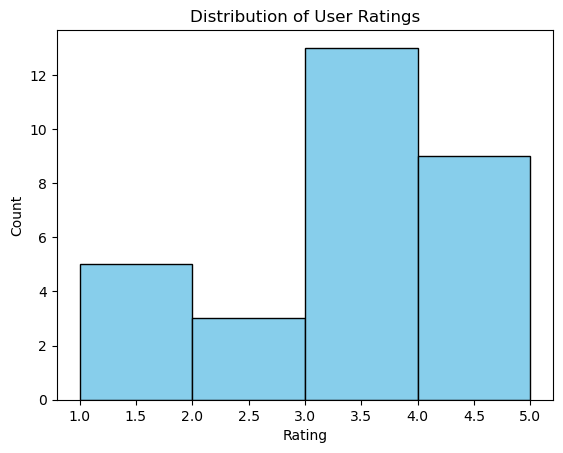

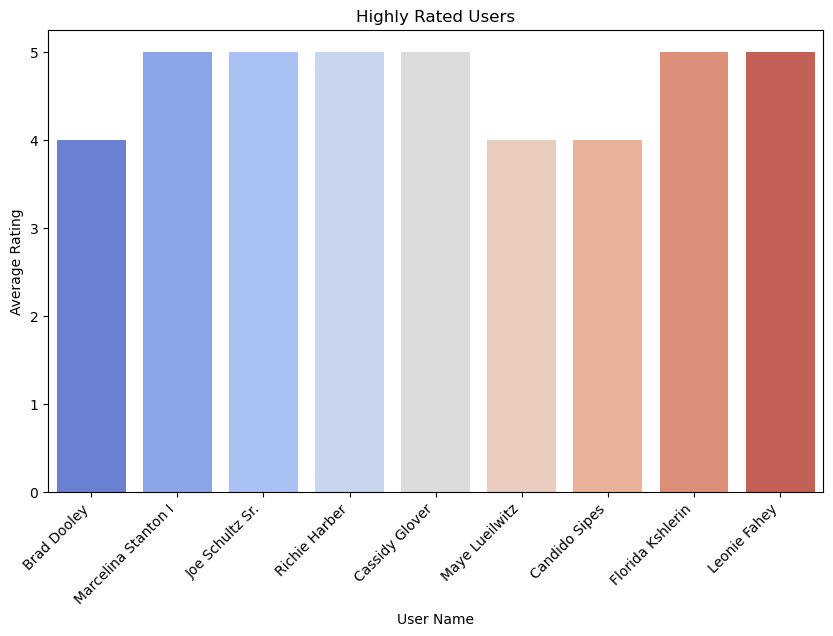

In [8]:
import seaborn as sns
user_rating_df = pd.read_sql_query("SELECT Rating FROM userrating", conn)

# Plotting histogram
plt.hist(user_rating_df['Rating'], bins=[1, 2, 3, 4, 5], edgecolor='black',color='skyblue')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Identify highly rated users
highly_rated_users_query = """
    SELECT u.Name, AVG(ur.Rating) AS AvgRating
    FROM User u
    JOIN UserRating ur ON u.User_ID = ur.RatedCallerID
    GROUP BY u.User_ID
    HAVING AVG(ur.Rating) >= 4;
"""
highly_rated_users = pd.read_sql_query(highly_rated_users_query,conn)

# Visualize highly rated users
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='AvgRating', data=highly_rated_users, palette='coolwarm')
plt.title('Highly Rated Users')
plt.xlabel('User Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Analysis on Subscription Types

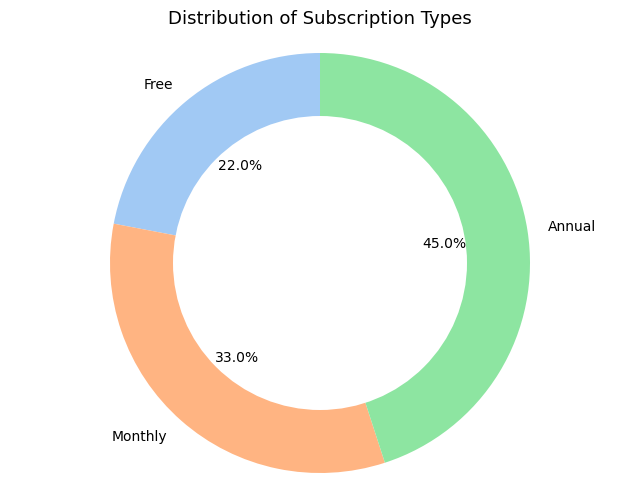

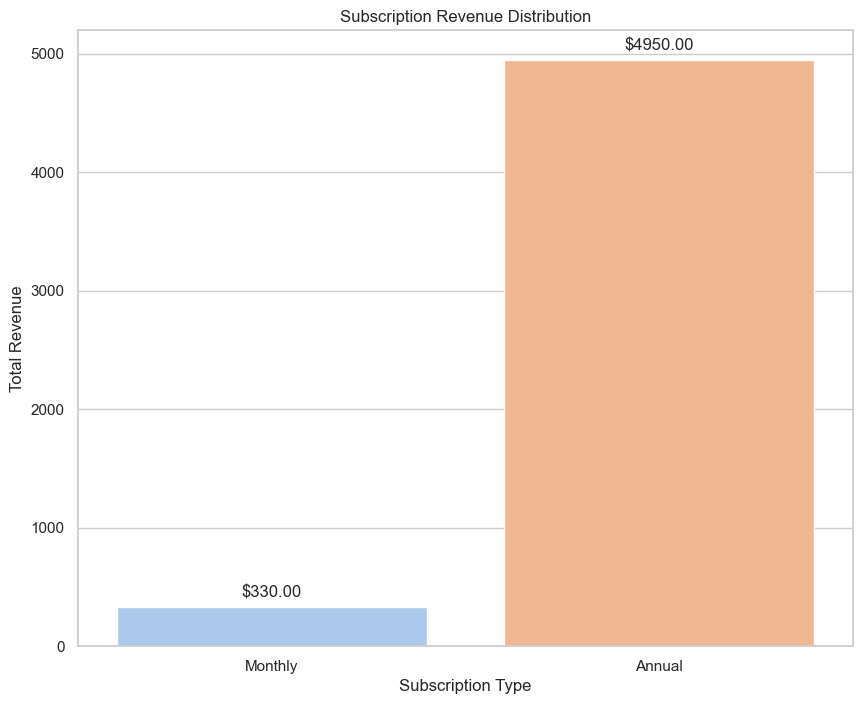

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read subscription data
subscription_df = pd.read_sql_query("""
    SELECT SubscriptionTypeName, COUNT(*) AS Count 
    FROM subscriptiontype s 
    JOIN subscription sub ON s.SubscriptionTypeID = sub.SubscriptionTypeID 
    GROUP BY SubscriptionTypeName;
""", conn)

# Custom color palette for the pie chart
colors = sns.color_palette("pastel")

# Plotting an insightful pie chart with annotations
plt.figure(figsize=(8, 6))
plt.pie(subscription_df['Count'], labels=subscription_df['SubscriptionTypeName'], autopct='%1.1f%%', colors=colors, startangle=90)

# Adding a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customizing the plot
plt.title('Distribution of Subscription Types', fontsize=13)
plt.axis('equal') 

# Display the plot
plt.show()

# Calculate subscription revenue
subscription_revenue_query = """
    SELECT st.SubscriptionTypeName, SUM(st.SubscriptionTypePrice) AS TotalRevenue
    FROM Subscription s
    JOIN SubscriptionType st ON s.SubscriptionTypeID = st.SubscriptionTypeID
    GROUP BY st.SubscriptionTypeName;
"""
subscription_revenue = pd.read_sql_query(subscription_revenue_query,conn)

import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the 'Free' subscription type from the bar chart
filtered_subscription_revenue = subscription_revenue[subscription_revenue['SubscriptionTypeName'] != 'Free']

# Set the style for the plot
sns.set(style="whitegrid")

# Visualize subscription revenue without 'Free' with a bar chart
plt.figure(figsize=(10, 8))
bar_chart = sns.barplot(x='SubscriptionTypeName', y='TotalRevenue', data=filtered_subscription_revenue, palette="pastel")

# Add revenue values on top of each bar with currency symbol
for p in bar_chart.patches:
    bar_chart.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Subscription Revenue Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Total Revenue')
plt.show()


#### Analysis on Blocklist Reasons

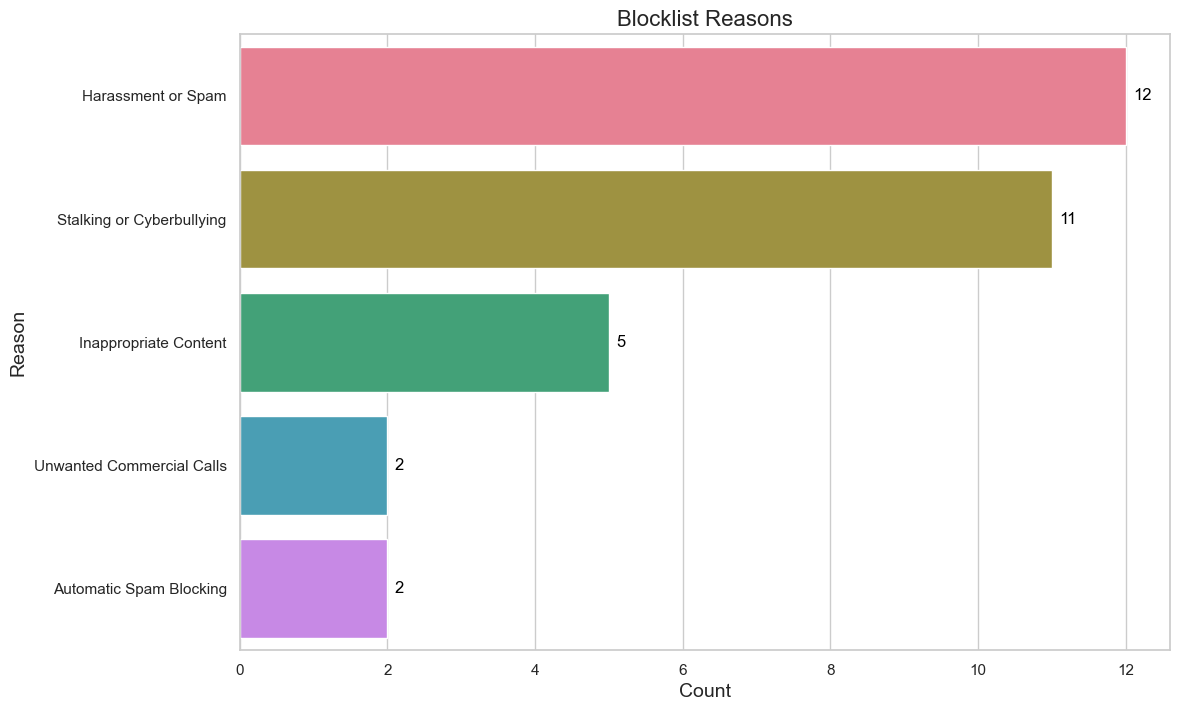

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read blocklist data
blocklist_df = pd.read_sql_query("SELECT Reason FROM BlockList;", conn)

    # Custom color palette for the bar chart
colors = sns.color_palette("husl", len(blocklist_df['Reason'].unique()))

    # Plotting a horizontal bar chart for better readability
plt.figure(figsize=(12, 8))
sns.countplot(y='Reason', data=blocklist_df, palette=colors, order=blocklist_df['Reason'].value_counts().index)
    
    # Adding counts on top of each bar
for i, count in enumerate(blocklist_df['Reason'].value_counts()):
    plt.text(count + 0.1, i, str(count), va='center', fontsize=12, color='black')

    # Customizing the plot
plt.title('Blocklist Reasons', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Reason', fontsize=14)
    
    # Display the plot
plt.show()

#### Observation
We can see that the total number of block list entries is the highest for the Reason - 'Harassment or Spam'.

#### Analysis on Call Duration vs User Rating

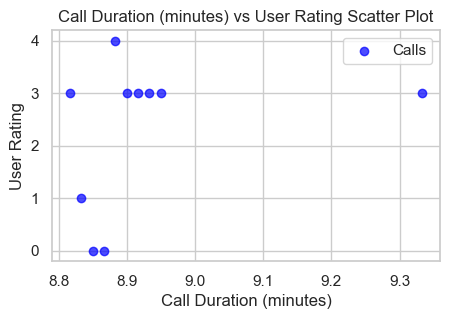

In [11]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt


    
# Sample query to fetch data for scatter plot
scatter_query = """
        SELECT c.CallDuration / 60 AS CallDuration, ur.Rating
        FROM CallLog c
        JOIN UserRating ur ON c.CallerUserID = ur.RatedCallerID
        WHERE ur.Rating IS NOT NULL
        LIMIT 10;
    """
    
# Read data into a Pandas DataFrame
scatter_data = pd.read_sql_query(scatter_query, conn)
    
    
    
# Scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(scatter_data['CallDuration'], scatter_data['Rating'], label='Calls', color='blue', alpha=0.7)
plt.title('Call Duration (minutes) vs User Rating Scatter Plot')
plt.xlabel('Call Duration (minutes)')
plt.ylabel('User Rating')
plt.legend()
plt.grid(True)
plt.show()

The scatter plot can reveal patterns or trends in the data. For instance, are there particular call durations that consistently receive higher or lower user ratings? Visual inspection makes it easier to spot such patterns.

In [12]:
conn.close()